In [1]:
'''
Agglomerative clustering:

-> each point is its own cluster.
-> Iteratively: merge the two “closest” clusters.
-> Stop: when the number of clusters = target k


to define closness -> linkage criteria

1. single linkage: minimum pairwise distance.
2. complete linkage: maximum pairwise distance
3. Average linkage: average pairwise distance

-> Dendrogram: tree diagram that shows how clusters were merged.

X-axis: data points
Y-axis: distance (or dissimilarity) at which merges happened

-> Silhouette Score:evaluate clustering quality


'''

'\nAgglomerative clustering:\n\n-> each point is its own cluster.\n-> Iteratively: merge the two “closest” clusters.\n-> Stop: when the number of clusters = target k\n\n\nto define closness -> linkage criteria\n\n1. single linkage: minimum pairwise distance.\n2. complete linkage: maximum pairwise distance\n3. Average linkage: average pairwise distance\n\n-> Dendrogram: tree diagram that shows how clusters were merged.\n\nX-axis: data points\nY-axis: distance (or dissimilarity) at which merges happened\n\n-> Silhouette Score:evaluate clustering quality\n\n\n'

In [ ]:
'''
Algorithm:

1. Load dataset (blobs or Iris).
2. Standardize features.
3.For each linkage {single, complete, average}:
    Run AgglomerativeClustering(k=3, linkage=...).

    Plot 2D scatter with cluster colors.

    Compute silhouette score.

4.Plot dendrogram with SciPy.
    Mark horizontal line at the level where you cut to form 3 clusters.

5Compare:
    Which linkage gives most balanced, separated clusters?

    Which has chaining issues?
'''

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [6]:
X, y_true = make_blobs(n_samples=150, centers=3, cluster_std=0.6, random_state=42)

# make blobs will generate data in clusters
# X - each point in 2D space
# y_true = its label: 0,1,2, as per its cluster

In [4]:
X

array([[-2.53069325,  9.95307232],
       [-3.01272814,  8.8287587 ],
       [-6.71103207, -7.25372931],
       [ 5.77159038,  2.07791637],
       [-6.57060603, -6.57183802],
       [ 5.01527924,  1.45887515],
       [-2.91535082,  9.3812919 ],
       [-2.79088225,  9.33982215],
       [-7.16278631, -6.22673924],
       [ 4.13180261,  1.06426135],
       [-5.60633347, -6.26063044],
       [-7.03116808, -7.6287795 ],
       [ 4.61905177,  1.27196286],
       [-6.81151678, -6.48283119],
       [ 4.05506983,  2.44542045],
       [-3.35842007,  8.76189893],
       [-6.76019137, -7.24023972],
       [-2.50612955,  8.87353385],
       [ 4.79017455,  2.18103861],
       [ 3.70948078,  2.01430747],
       [-2.83582726,  9.08083968],
       [-7.16459438, -7.27210713],
       [ 4.50580117,  2.40156998],
       [-5.59326074, -6.49975818],
       [ 3.99734334,  2.26265313],
       [-7.63615756, -6.32939243],
       [-6.57663482, -6.36065648],
       [-2.30302665,  7.95646203],
       [-5.59980717,

In [5]:
y_true

array([0, 0, 2, 1, 2, 1, 0, 0, 2, 1, 2, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0, 2,
       1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 2, 2, 1, 1, 2, 2, 1, 0, 0, 2, 0, 0,
       1, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 2, 0, 1, 2, 0, 2, 2, 2, 1, 1, 1,
       1, 2, 1, 1, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 2, 1, 0, 0, 1,
       2, 0, 2, 0, 0, 2, 2, 1, 2, 2, 0, 1, 1, 1, 0, 0, 1, 0, 2, 1, 0, 2,
       2, 0, 1, 2, 2, 1, 2, 1, 2, 0, 2, 2, 1, 2, 0, 2, 2, 1, 1, 2, 0, 0,
       1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1])

In [7]:
from sklearn.preprocessing import StandardScaler
# Standardize (important for clustering with distances)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [10]:
def plot_clusters(X, labels, title):
    plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=40)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

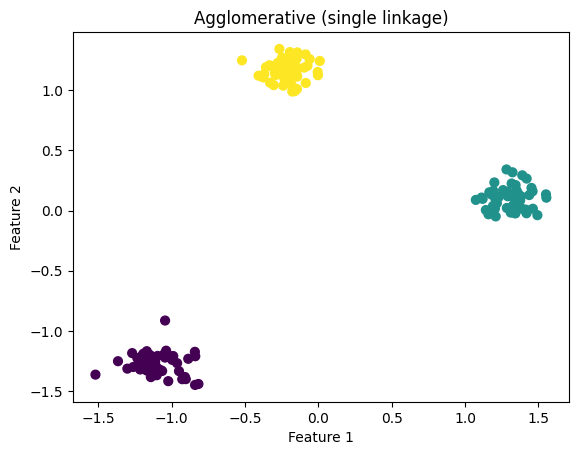

Silhouette Score (single linkage): 0.908


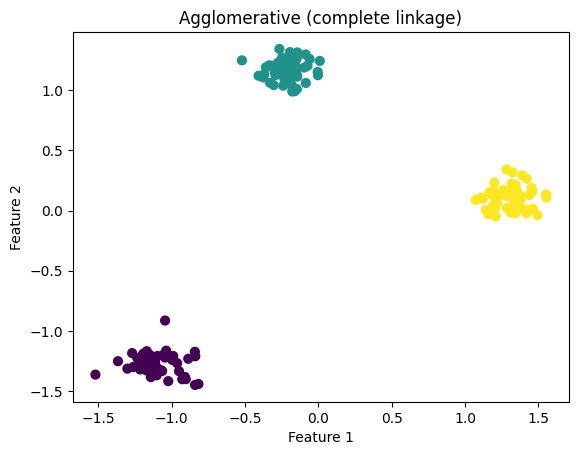

Silhouette Score (complete linkage): 0.908


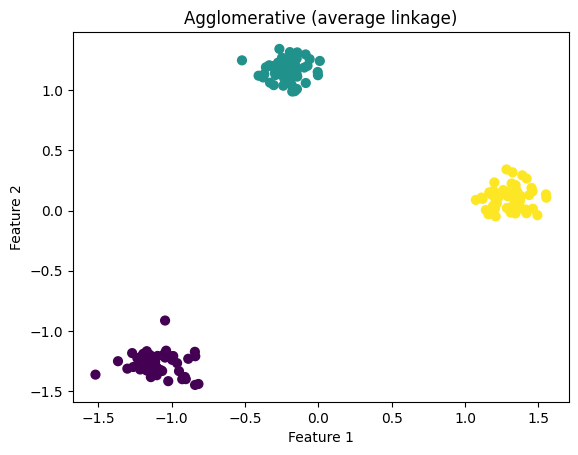

Silhouette Score (average linkage): 0.908


In [12]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
# try different linkage:

linkages = ['single', 'complete', 'average']
for link in linkages:
    # Run Agglomerative Clustering
    clustering = AgglomerativeClustering(n_clusters=3, linkage=link)
    labels = clustering.fit_predict(X_std)
    # Plot clusters
    plot_clusters(X_std, labels, f"Agglomerative ({link} linkage)")

    # Evaluate Silhouette Score
    score = silhouette_score(X_std, labels)
    print(f"Silhouette Score ({link} linkage): {score:.3f}")


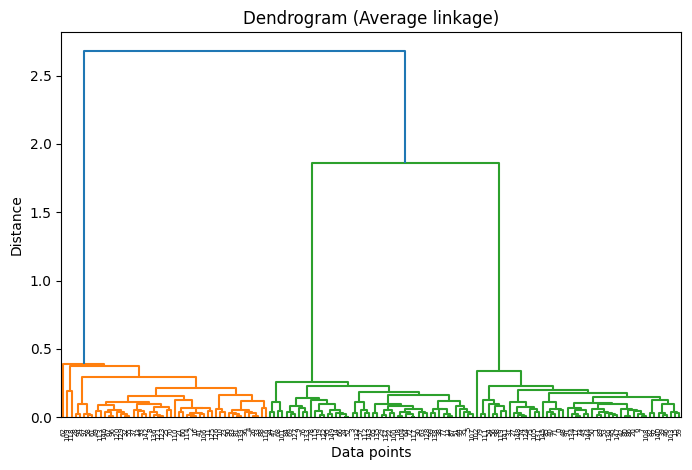

In [14]:
# Dendrogram:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X_std, method='average')  # hierarchical clustering
plt.figure(figsize=(8, 5))
dendrogram(Z)
plt.axhline(y=5, color='r', linestyle='--')  # cut at height ~5 to get 3 clusters
plt.title("Dendrogram (Average linkage)")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()